In [165]:
%pylab inline
import seaborn as sns
%run metascripts.py

from matplotlib_venn import venn2

Populating the interactive namespace from numpy and matplotlib


In [1]:
import pandas as pd

In [9]:
D=pd.read_csv('../WD/Genecatalog/clustering/orf_mapping.tsv',index_col=0,sep='\t')

In [16]:
N=D[['Gene','Genome']].dropna().groupby(['Gene','Genome']).size()

5


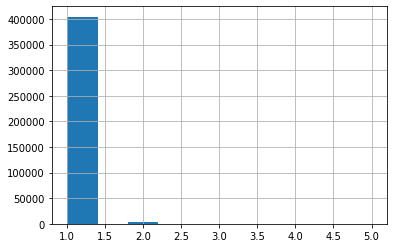

In [22]:
print(N.max())
N.hist()

In [23]:
N= (N>0).astype(int)

In [74]:
g2= N.groupby(level=0).size()#/D.Genome.dropna().unique().shape[0]

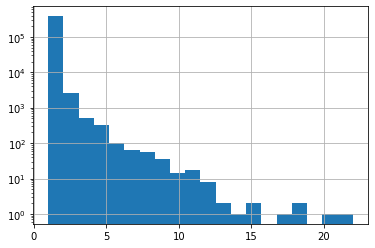

In [75]:
g2.hist(log=True,bins='auto')

In [104]:
Nmany=N.loc[g2.index[g2>10]]

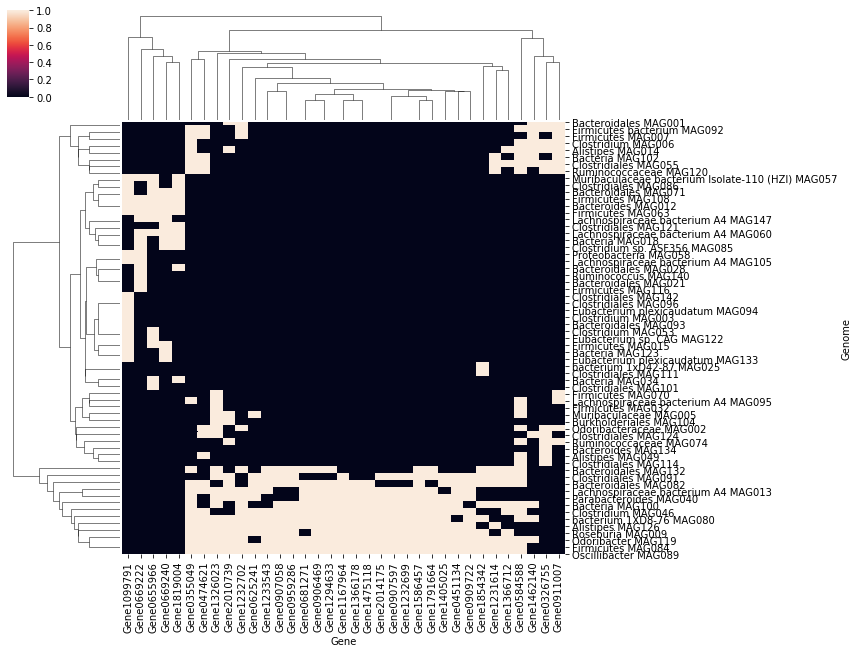

In [106]:
df=Nmany.unstack(fill_value=0).T
sns.clustermap(df,yticklabels=Labels.loc[df.index])

In [191]:
g2KO=pd.read_csv('../WD/Genecatalog/annotations/Kegg.tsv',index_col=0,squeeze=True,sep='\t')
g2eggNOG=pd.read_csv('../WD/Genecatalog/annotations/eggNog.tsv',index_col=0,sep='\t')

In [174]:
KO_names=pd.read_csv('/Users/silas/Desktop/Pathways_minpath/KO_names.txt',sep='  ',header=None,index_col=0)
KO_names.columns=['Description']

/Users/silas/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


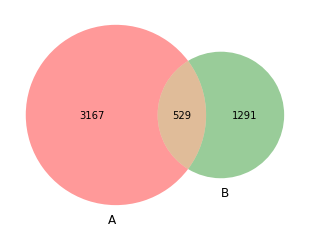

In [176]:
venn2((set(g2KO.KO),set(KO_names.index)))

In [178]:
g2KO=g2KO.join(KO_names,on='KO')

In [189]:
g2KO.loc[df.columns]

/Users/silas/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,KO,Description
Gene,,
Gene0326755,K02867,NaN
Gene0355049,K02110,NaN
Gene0451134,K00831,"serC, PSAT1; phosphoserine aminotransferase [E..."
Gene0451134,K00831,"serC, PSAT1; phosphoserine aminotransferase [E..."
Gene0474621,K02954,NaN
Gene0584588,K02946,NaN
Gene0625241,K02913,NaN
Gene0655966,K02874,NaN
Gene0669222,K02518,NaN


Check_cultivable                    Warm.msh
Eubacterium                         assembly_report_scafolds.html
Figures                             assembly_report_we.html
Genome_FC.tsv                       combined_contig_stats_Contigs.tsv
KEGGgenes                           combined_contig_stats_Scaffolds.tsv
MAG021_refseq.txt                   metadata.tsv
Refseq_dsits.txt                    notebooks
WD                                  test_metge_coverages.ipynb


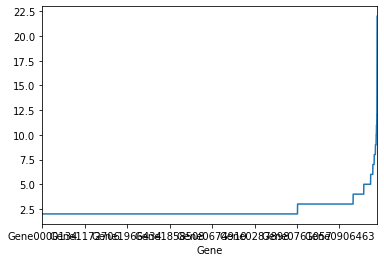

In [64]:
g2.loc[g2>1].sort_values().plot()

# Graph

In [27]:
import networkx as nx

In [37]:
G= nx.Graph()
G.add_nodes_from(D.Gene.unique(),partition='Gene')
G.add_nodes_from(D.Genome.unique(),partition='Genome')
G= nx.from_pandas_edgelist(D,source='Gene', target='Genome',create_using=G  )

In [ ]:
deg

In [41]:
deg= G.degree()